<a href="https://colab.research.google.com/github/IagoAlmeida-ias/Python-para-Data-Science/blob/main/des_base_Notav2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pacotes de Manipulação de Dados

import numpy as np
import pandas as pd

# Pacotes Gráficos

import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de Modelagem

import statsmodels.api as sm

In [ ]:
# Impot da base dados

df = pd.read_csv('Base_Notas_v2.csv', index_col='id')

In [ ]:
df.head()

,horas_estudo,aulas_participadas,nota_exame
id,,,
0,5.993428,8,76.119754
1,4.723471,11,60.929961
2,6.295377,12,81.731317
3,8.046060,7,82.699637
4,4.531693,5,70.662399


In [ ]:
df.tail()

,horas_estudo,aulas_participadas,nota_exame
id,,,
25,5.221845,6,68.005282
26,2.698013,9,57.246133
27,5.751396,12,83.669643
28,3.798723,14,84.799914
29,4.416613,13,76.441324


In [ ]:
df.shape

(30, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   horas_estudo        30 non-null     float64
 1   aulas_participadas  30 non-null     int64  
 2   nota_exame          30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 960.0 bytes


In [ ]:
df.isnull().sum()

,0
horas_estudo,0
aulas_participadas,0
nota_exame,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe().round()

,horas_estudo,aulas_participadas,nota_exame
count,30.0,30.0,30.0
mean,5.0,10.0,72.0
std,2.0,3.0,9.0
min,1.0,5.0,54.0
25%,4.0,8.0,66.0
50%,5.0,10.0,71.0
75%,6.0,12.0,78.0
max,8.0,14.0,89.0


# Complementando - Análise Exploratória dos Dados

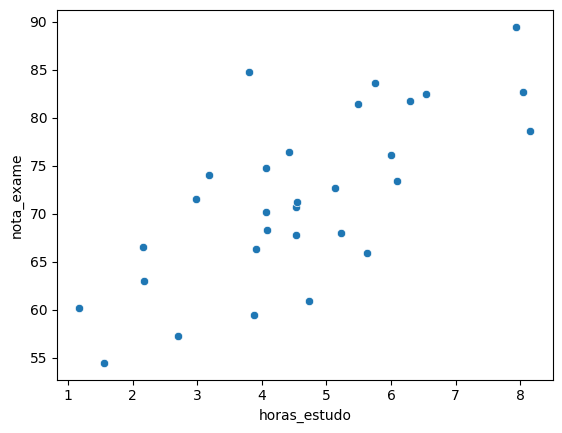

In [ ]:
# Gráfico de Dispersão por Horas de estudo

sns.scatterplot(x=df['horas_estudo'],
                y=df['nota_exame']);

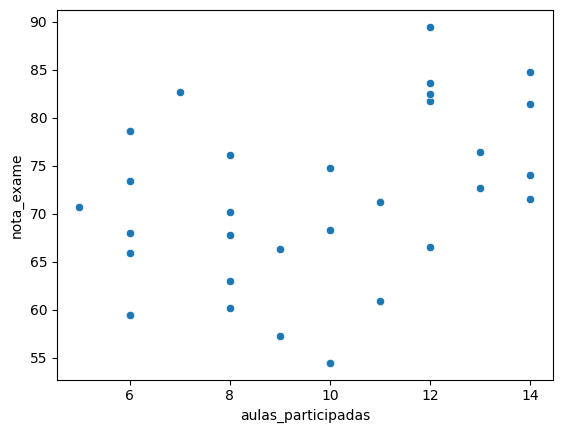

In [ ]:
# Gráfico de Dispersão por Aulas_part

sns.scatterplot(x=df['aulas_participadas'],
                y=df['nota_exame']);

In [ ]:
# Correlação linear Persen

df.corr()

,horas_estudo,aulas_participadas,nota_exame
horas_estudo,1.000000,-0.136144,0.721178
aulas_participadas,-0.136144,1.000000,0.385559
nota_exame,0.721178,0.385559,1.000000


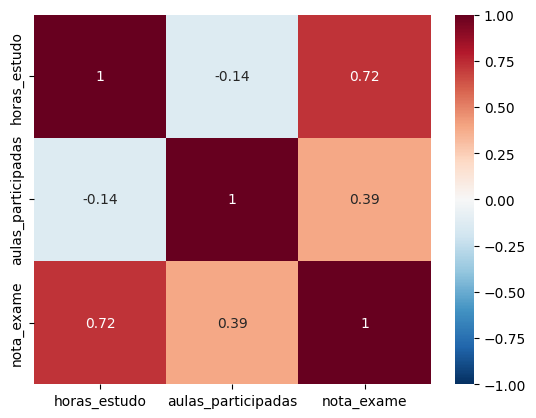

In [ ]:
# Grafico HeatMap

sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, vmin=-1, vmax=1);

In [ ]:
# Variável resposta

y = df['nota_exame']

# Variável explicativa

df['intercepto'] = 1
x = df[ ['intercepto', 'horas_estudo', 'aulas_participadas'] ]

In [ ]:
# Ajuste do Modelo

modelo = sm.OLS(y,x)
res = modelo.fit()

In [ ]:
# Resultado do ajuste do modelo

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             nota_exame   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     42.41
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           4.66e-09
Time:                        19:59:51   Log-Likelihood:                -86.250
No. Observations:                  30   AIC:                             178.5
Df Residuals:                      27   BIC:                             182.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto            38.8906      3